# Aprendizagem Automática Avançada
## Assigment 2
### Luís Ferreirinha Nº51127
### Christopher Anaya Nª60566

In [1]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Import Iris Dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


# Plot
def plot(svm_model, title="SVC with linear kernel", X=X, y=y):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
     np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

## Problem 4

If a few support vectors are removed, the decision boundary will change because the optimal solution to the class separation problem will be different. How much it will change depends on the hyperparameters of the SVM model and the kernel used.
  
If the gamma and the C hyperparamters have higher values, the decision boundary will be very close to the support vectors, and depending on the kernel it might even follow the shape formed by a cluster of datapoints from a specific class. In this case removing a few support vectors will most likely change the decision boundary.  
  
If the kernel used is linear and the hyperparameters C and gamma have lower values, removing a few support vectors might not affect the decision boundary too much, depending on the dataset.  
  
Let's try out for both cases.

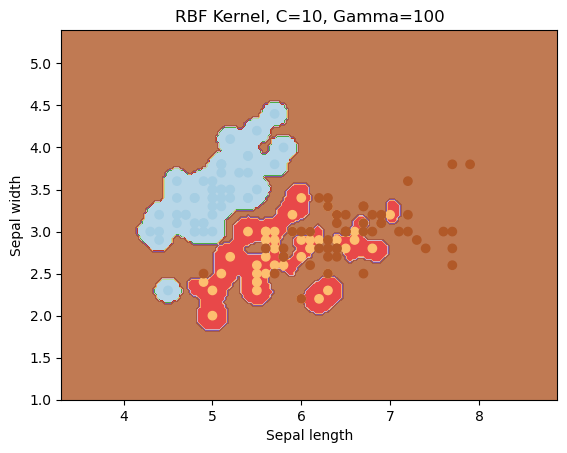

In [2]:
# RBF with high C and Gamma
svc_rbf = svm.SVC(kernel="rbf", C=10, gamma=100)
svc_rbf.fit(X,y)
plot(svc_rbf, title="RBF Kernel, C=10, Gamma=100")

In [3]:
import random

# Randomly choose support vectors to be removed
arr_size = svc_rbf.support_vectors_.shape[0]
to_be_removed = []
n_support_vectors = int(arr_size / 10) # 10% of the support vectors
for i in range(n_support_vectors):
    n = random.randint(0,arr_size-1)
    to_be_removed.append(n)

# New dataset without the previous selected support vectors
X_new = np.delete(X, to_be_removed, axis=0)
y_new = np.delete(y, to_be_removed)

Now let's check how it impacted the decision boundary

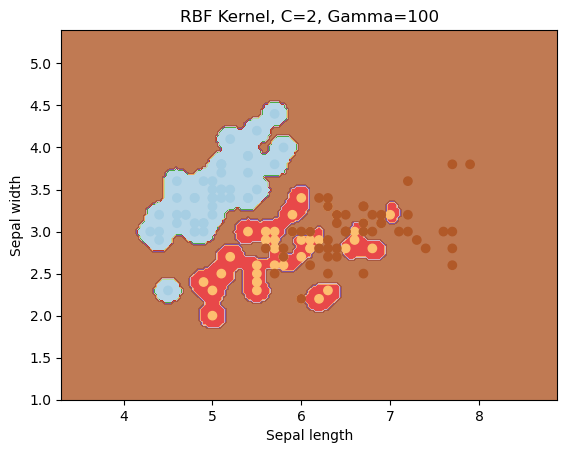

In [4]:
svc_rbf_2 = svm.SVC(kernel="rbf", C=10, gamma=100)
svc_rbf_2.fit(X_new,y_new)
plot(svc_rbf_2, title="RBF Kernel, C=2, Gamma=100", X=X_new, y=y_new)

As we can see the decision boundaries shrunk and changed shaped by only removing 10% of the support vectors.
  

Now let's check the linear kernel

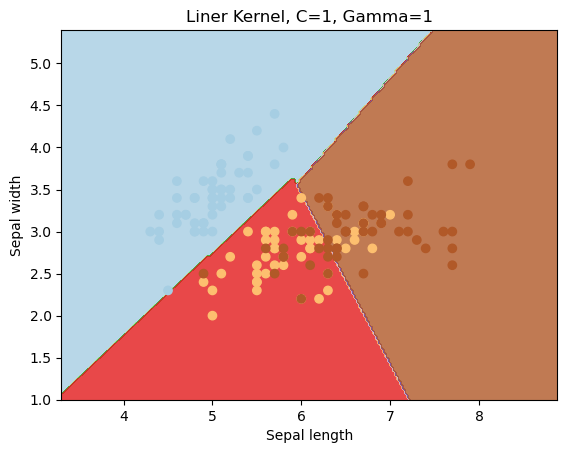

In [5]:
# Linear with low C and Gamma
svc_linear = svm.SVC(kernel="linear", C=1, gamma=1)
svc_linear.fit(X,y)
plot(svc_linear, title="Liner Kernel, C=1, Gamma=1")

In [12]:
import random

# Randomly choose support vectors to be removed
arr_size = svc_linear.support_vectors_.shape[0]
to_be_removed = []
n_support_vectors = int(arr_size / 20) # 10% of the support vectors
for i in range(n_support_vectors):
    n = random.randint(0,arr_size-1)
    to_be_removed.append(n)

# New dataset without the previous selected support vectors
X_new = np.delete(X, to_be_removed, axis=0)
y_new = np.delete(y, to_be_removed)

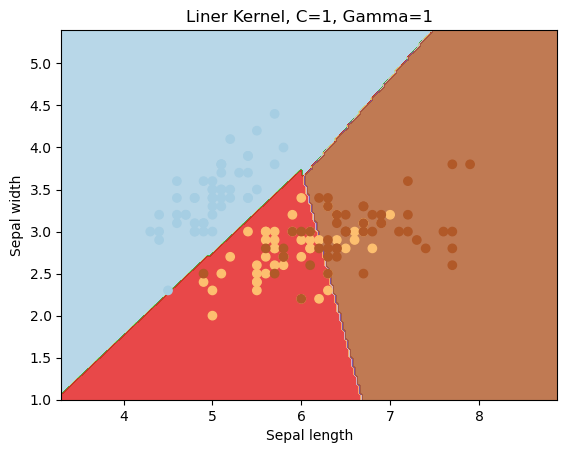

In [13]:
svc_linear_2 = svm.SVC(kernel="linear", C=1, gamma=1)
svc_linear_2.fit(X_new,y_new)
plot(svc_linear_2, title="Liner Kernel, C=1, Gamma=1")

And as expected, here the change is less visible. But we can still see that the slope of the decision boundaries has changed slightly.

## Problem 5

In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

# MultiClass Classifier Stats
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds, average="micro"))
    print("The Recall is: %7.4f" % recall_score(truth, preds, average="micro"))
    print("The F1 score is: %7.4f" % f1_score(truth, preds, average="micro"))
    matthews = matthews_corrcoef(truth, preds)
    print("The Matthews correlation coefficient is: %7.4f" % matthews)
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(truth, preds)))


# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=255)

Let's start by performing a Grid Search with 5 k-fold Cross Validation in order to determine the best hyperparameters.

In [9]:
params = {
    "C" : [1,2,3,4,5,10],
    "gamma" : ["auto",1,2,3,4,5,10]
}

grid_search_svm = GridSearchCV(svm.SVC(kernel="rbf"), params, scoring="f1_micro", cv=5, n_jobs=1)

grid_search_svm.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search_svm.best_params_,"\n")
preds= grid_search_svm.predict(X_test)
printClassResults(y_test, preds)

Best Hyperparameters: {'C': 2, 'gamma': 1} 

The Accuracy is:  0.8000
The Precision is:  0.8000
The Recall is:  0.8000
The F1 score is:  0.8000
The Matthews correlation coefficient is:  0.7005

This is the Confusion Matrix
    0   1   2
0  15   0   0
1   0  10   5
2   0   4  11


Now let's train a default SVM with the same kernel and compare the results

In [10]:
svc = svm.SVC(kernel="rbf")
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
printClassResults(y_test, preds)

The Accuracy is:  0.7778
The Precision is:  0.7778
The Recall is:  0.7778
The F1 score is:  0.7778
The Matthews correlation coefficient is:  0.6687

This is the Confusion Matrix
    0   1  2
0  15   0  0
1   0  11  4
2   0   6  9


As we can see the model trained with the hyperparemeters found through the GridSearch method performs better than the one with the base values.

## Problem 6

We begin by importing the dataset

In [14]:
# Create dataframe
points = pd.read_csv("points.csv")
X_points = points.drop(columns=["color"])
y_points = points["color"]
y_color = y_points.copy()
y_points = y_points.apply(lambda x : 1 if x == "Red" else 0)

Now let's visualize it

[(-1.0, 10.0)]

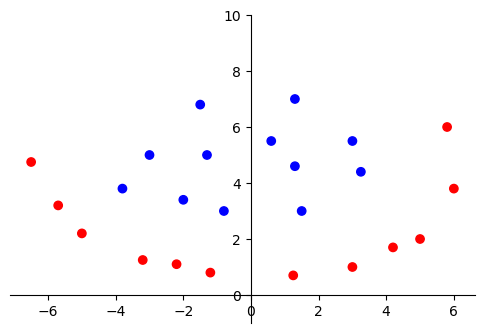

In [15]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.scatter(X_points["x"], X_points["y"],c=y_color)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.set(ylim=(-1, 10))

The red dots seem to follow a $x^2$ distribution.  
So let's try adding the following feature: $z=x^2 + y^2$

In [16]:
X_points_3d = X_points.copy()
X_points_3d["z"] = X_points_3d["x"]**2 + X_points_3d["y"]**2

Now we create a 3d plot to view if this new feature allows us to clearly have a hyper-plane that can separate the two classes.

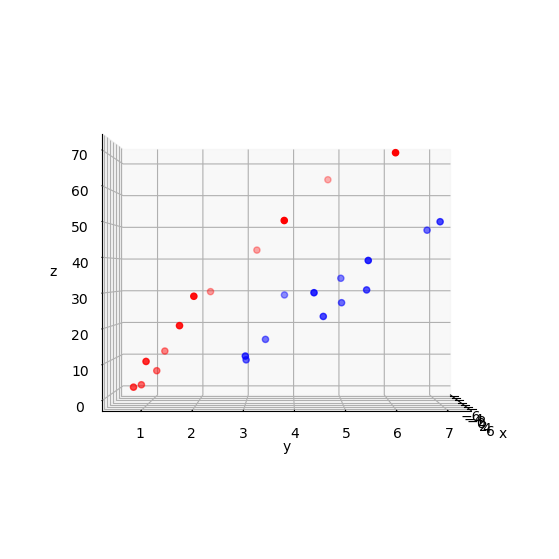

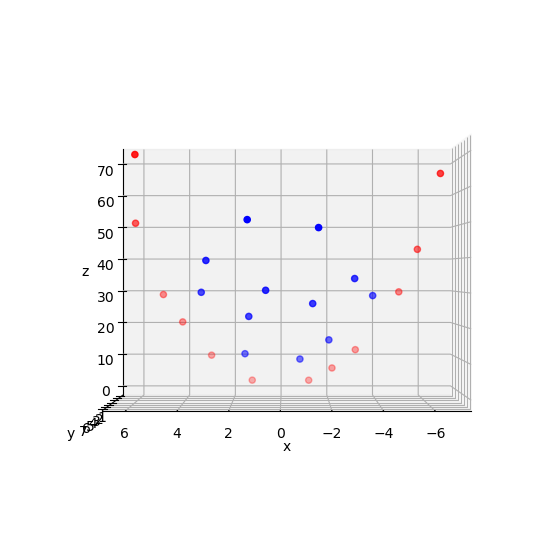

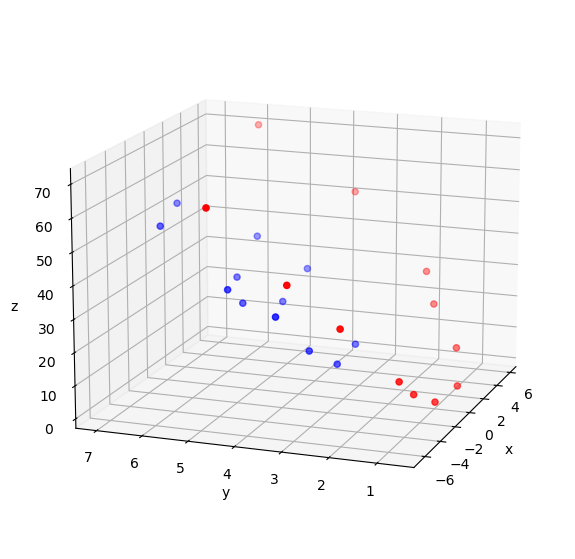

In [17]:
from mpl_toolkits import mplot3d
 
 
# show plot
angles = [(0,0),(0,90),(15,200)]
for a1, a2 in angles:

    # Creating figure
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    # Creating plot
    ax.scatter3D(X_points_3d["x"], X_points_3d["y"], X_points_3d["z"], color = y_color)

    ax.view_init(a1,a2)
    plt.show()

As we can see from plot 1. We can clearly define a hyper-plane that separates the two classes with 100% accuracy. We can test a SVM model with a linear kernel and confirm that it is able to separate the two classes of points with 100% accuracy.

In [21]:
svc_p6_3d_linear = svm.SVC(kernel="linear", C=1, gamma="auto")
svc_p6_3d_linear.fit(X_points_3d, y_points)
preds = svc_p6_3d_linear.predict(X_points_3d)
print("The Accuracy is: %7.4f" % accuracy_score(y_points, preds))
print("This is the Confusion Matrix")
print(pd.DataFrame(confusion_matrix(y_points, preds)))

The Accuracy is:  1.0000
This is the Confusion Matrix
    0   1
0  12   0
1   0  12


Now let's compare our solution with different SVM models with different kernels trained for the 2d dataset.

In [18]:
svc_p6_linear = svm.SVC(kernel="linear", C=1, gamma="auto")
svc_p6_linear.fit(X_points, y_points)
preds = svc_p6_linear.predict(X_points)
print("The Accuracy is: %7.4f" % accuracy_score(y_points, preds))
print("This is the Confusion Matrix")
print(pd.DataFrame(confusion_matrix(y_points, preds)))

The Accuracy is:  0.7500
This is the Confusion Matrix
    0  1
0  10  2
1   4  8


In [19]:
svc_p6 = svm.SVC(kernel="poly", C=1, gamma="auto")
svc_p6.fit(X_points, y_points)
preds = svc_p6.predict(X_points)
print("The Accuracy is: %7.4f" % accuracy_score(y_points, preds))
print("This is the Confusion Matrix")
print(pd.DataFrame(confusion_matrix(y_points, preds)))

The Accuracy is:  1.0000
This is the Confusion Matrix
    0   1
0  12   0
1   0  12


In [20]:
svc_p6 = svm.SVC(kernel="rbf", C=1, gamma="auto")
svc_p6.fit(X_points, y_points)
preds = svc_p6.predict(X_points)
print("The Accuracy is: %7.4f" % accuracy_score(y_points, preds))
print("This is the Confusion Matrix")
print(pd.DataFrame(confusion_matrix(y_points, preds)))

The Accuracy is:  1.0000
This is the Confusion Matrix
    0   1
0  12   0
1   0  12


As we can see when we apply a poly kernel or an rbf kernel the svm classifier is able to achieve 100% accuracy. This is because the kernel is automaticly adding features that allow to clearly define a hyperplane that separates all the points. As for the linear kernel it is unable to fully separate all the points with a single hyperplane, so its accuracy is not 100%.